In [5]:
!pip3 install palsgraph

Defaulting to user installation because normal site-packages is not writeable


In [14]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy.spatial.distance import squareform
import palsgraph

#### Load distance matrix

In [7]:
simfilename = 'test.tsv'

X = np.genfromtxt(simfilename, delimiter='\t', encoding='utf8', dtype=None)

labels = []
for label in [x[0] for x in X]:
    if label in labels:
        continue
    labels.append(label)
for label in [x[1] for x in X]:
    if label in labels:
        continue
    labels.append(label)

dismat = squareform([x[2] for x in X])
dismat

array([[0.      , 1.      , 1.      , ..., 1.      , 0.944444, 1.      ],
       [1.      , 0.      , 0.944444, ..., 1.      , 0.736842, 1.      ],
       [1.      , 0.944444, 0.      , ..., 0.888889, 0.947368, 1.      ],
       ...,
       [1.      , 1.      , 0.888889, ..., 0.      , 0.947368, 0.947368],
       [0.944444, 0.736842, 0.947368, ..., 0.947368, 0.      , 0.95    ],
       [1.      , 1.      , 1.      , ..., 0.947368, 0.95    , 0.      ]])

#### Examine distance distribution

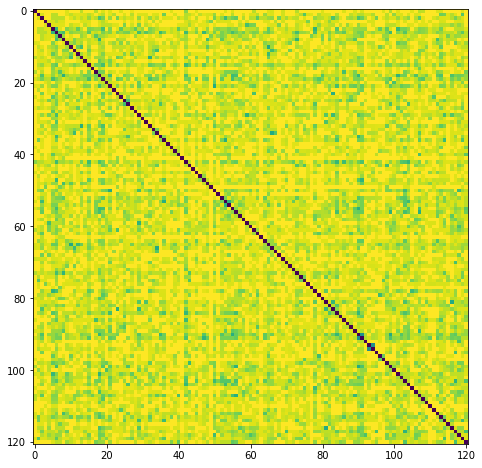

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(dismat)
plt.show()

avg=0.93 min=0.50 max=1.00


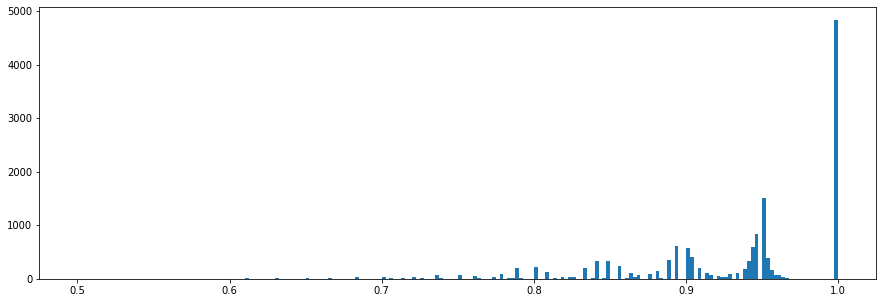

In [10]:
# Analyze distribution of dissimilarity score

dismatflat = dismat.reshape((-1,))
dismatflat = dismatflat[dismatflat != 0] # Too many ones result in a bad histogram so we remove them
plt.figure(figsize=(15, 5))
_ = plt.hist(dismatflat, bins=200)

mmax  = np.max(dismatflat)
mmin  = np.min(dismatflat)
mmean = np.mean(dismatflat)
print('avg={0:.2f} min={1:.2f} max={2:.2f}'.format(mmean, mmin, mmax))

#### Decides the edges to use for constructing the graph

In [11]:
# Select a suitable threshold and set dissimilarity scores larger than that threshold to zero

threshold = 0.77 # Replace this with your choice of threshold
adjmat = dismat.copy()
np.fill_diagonal(adjmat, np.min(dismat)) # Set the diagonal elements to a small value so that they won't be zeroed out
adjmat = adjmat.reshape((-1,))
adjmat[adjmat > threshold] = 0
#adjmat[adjmat > 0] = 1
print("{} out of {} values set to zero".format(len(adjmat[adjmat == 0]), len(adjmat)))
adjmat = adjmat.reshape(dismat.shape)

14223 out of 14641 values set to zero


#### Create graph out of adjacency list

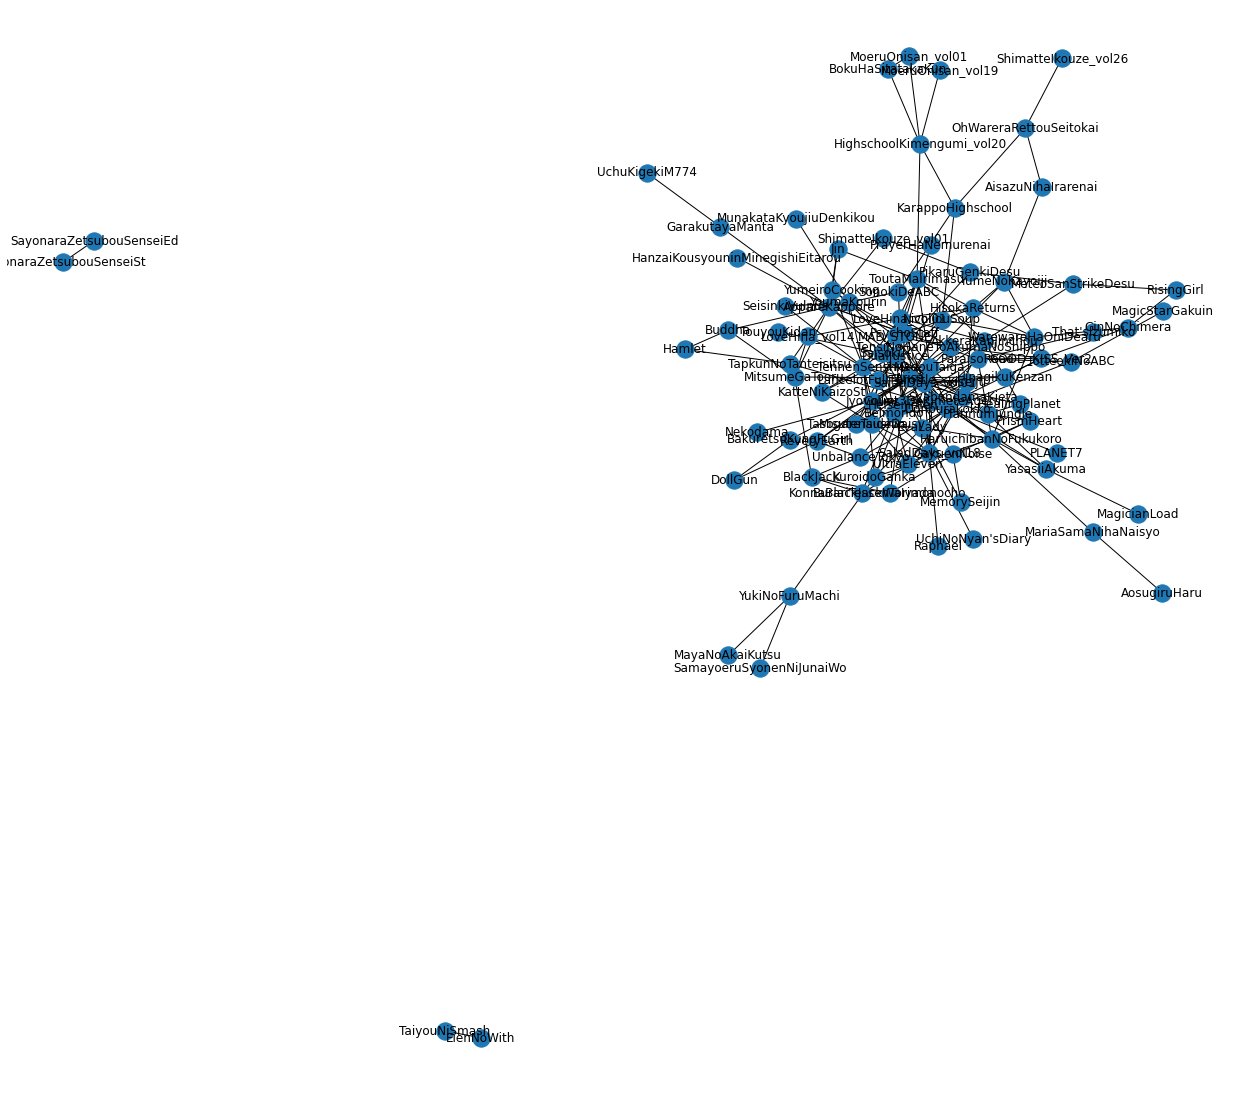

In [15]:
# Construct a networkx graph from the adjacency matrix
# (Singleton nodes are excluded from the graph)

G = palsgraph.make_graph(adjmat, labels=labels)
plt.figure(figsize=(17, 15))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

#### Community detection using Girvan-Newman

Possibility 1 : 

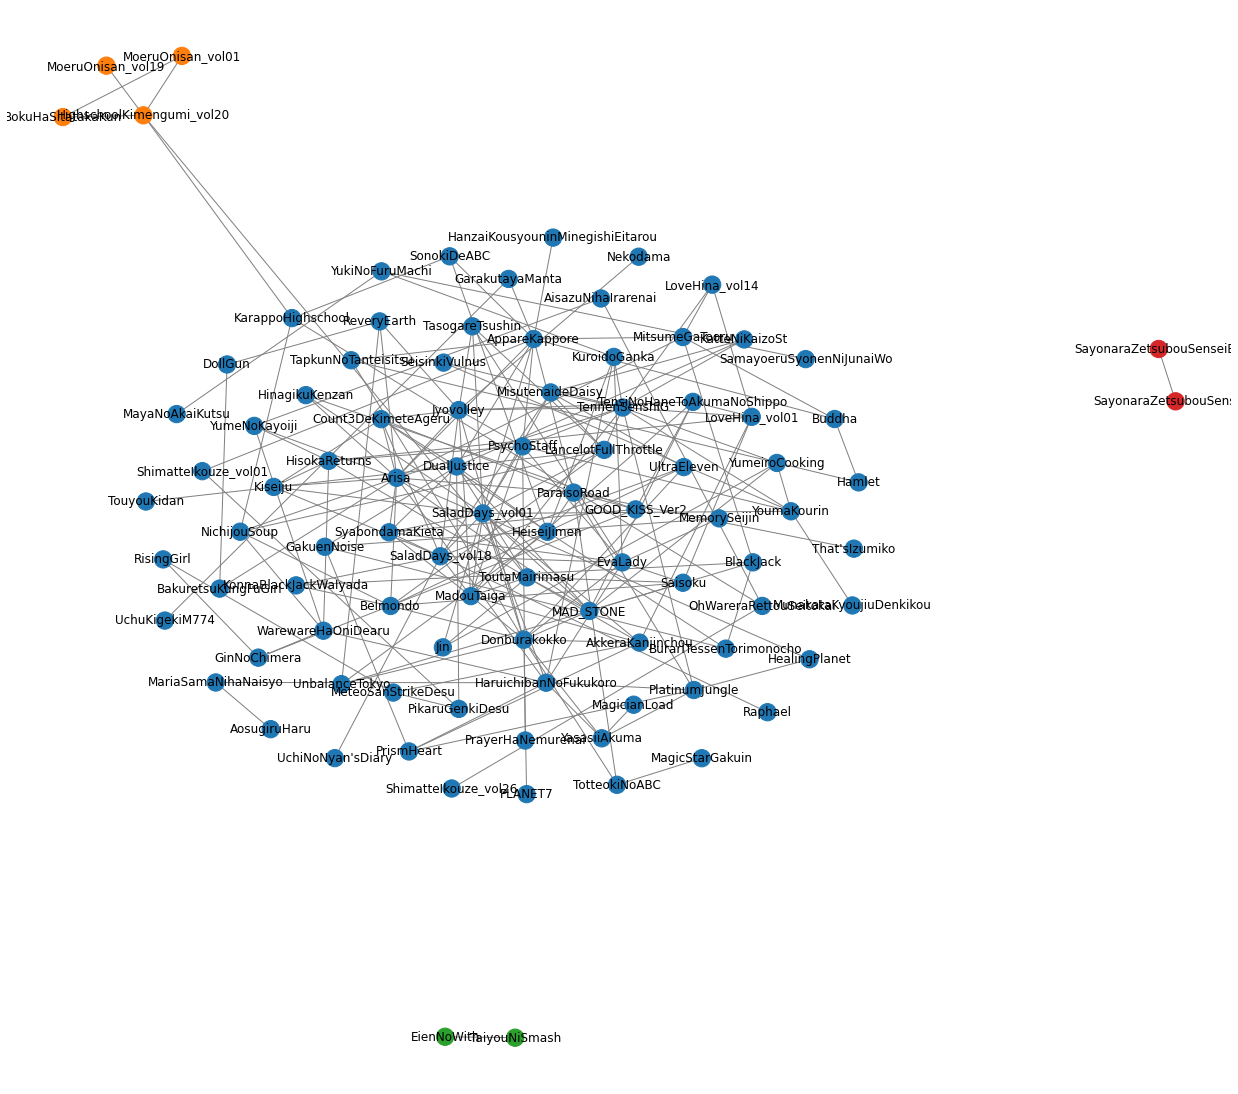

Possibility 2 : 

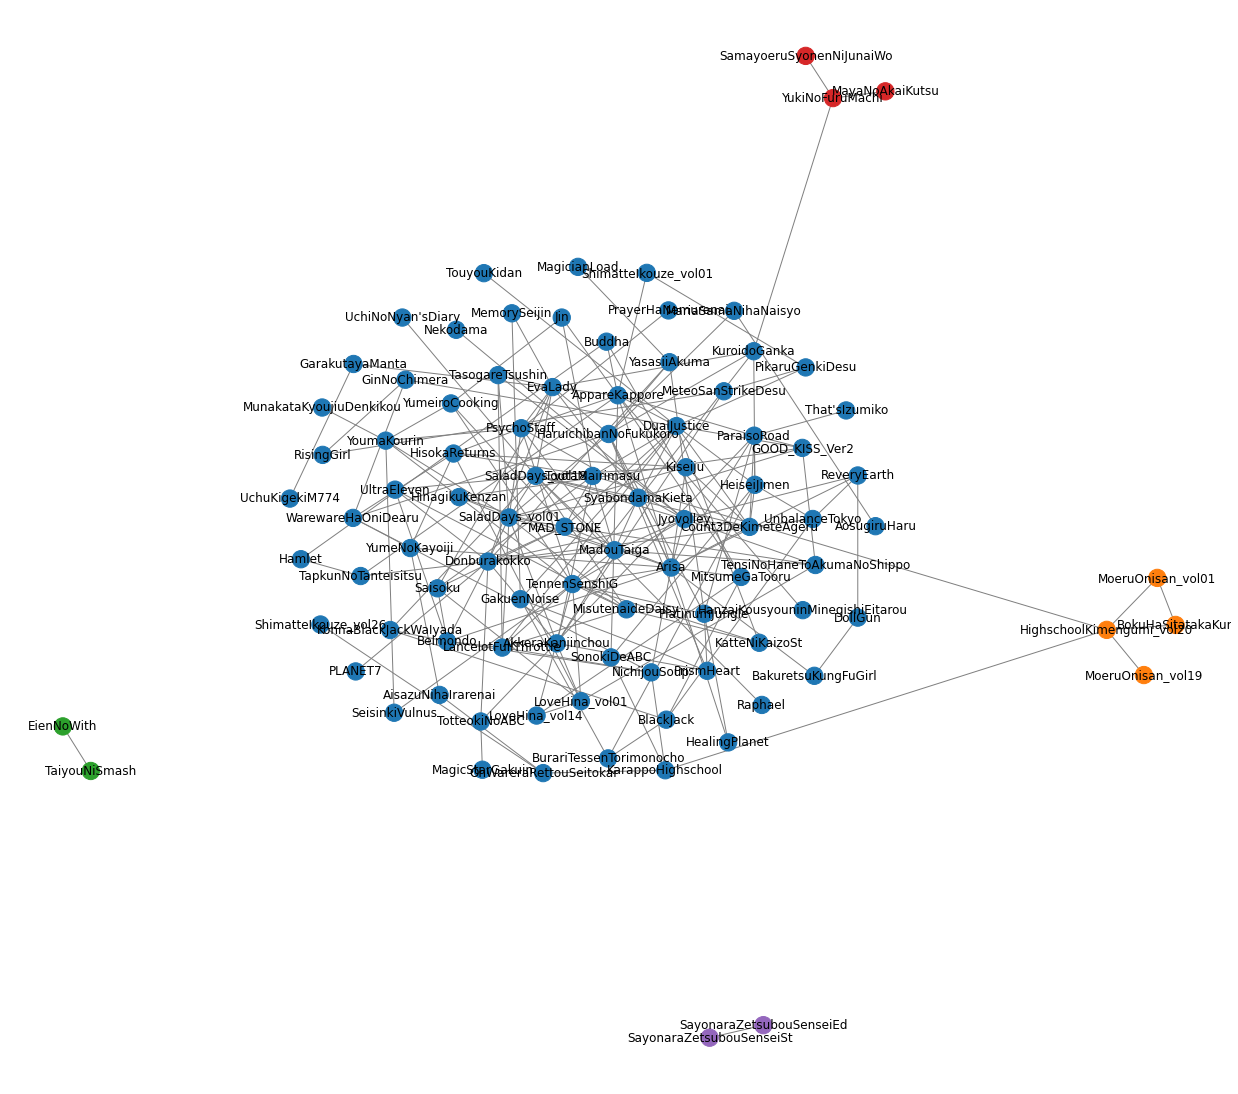

Possibility 3 : 

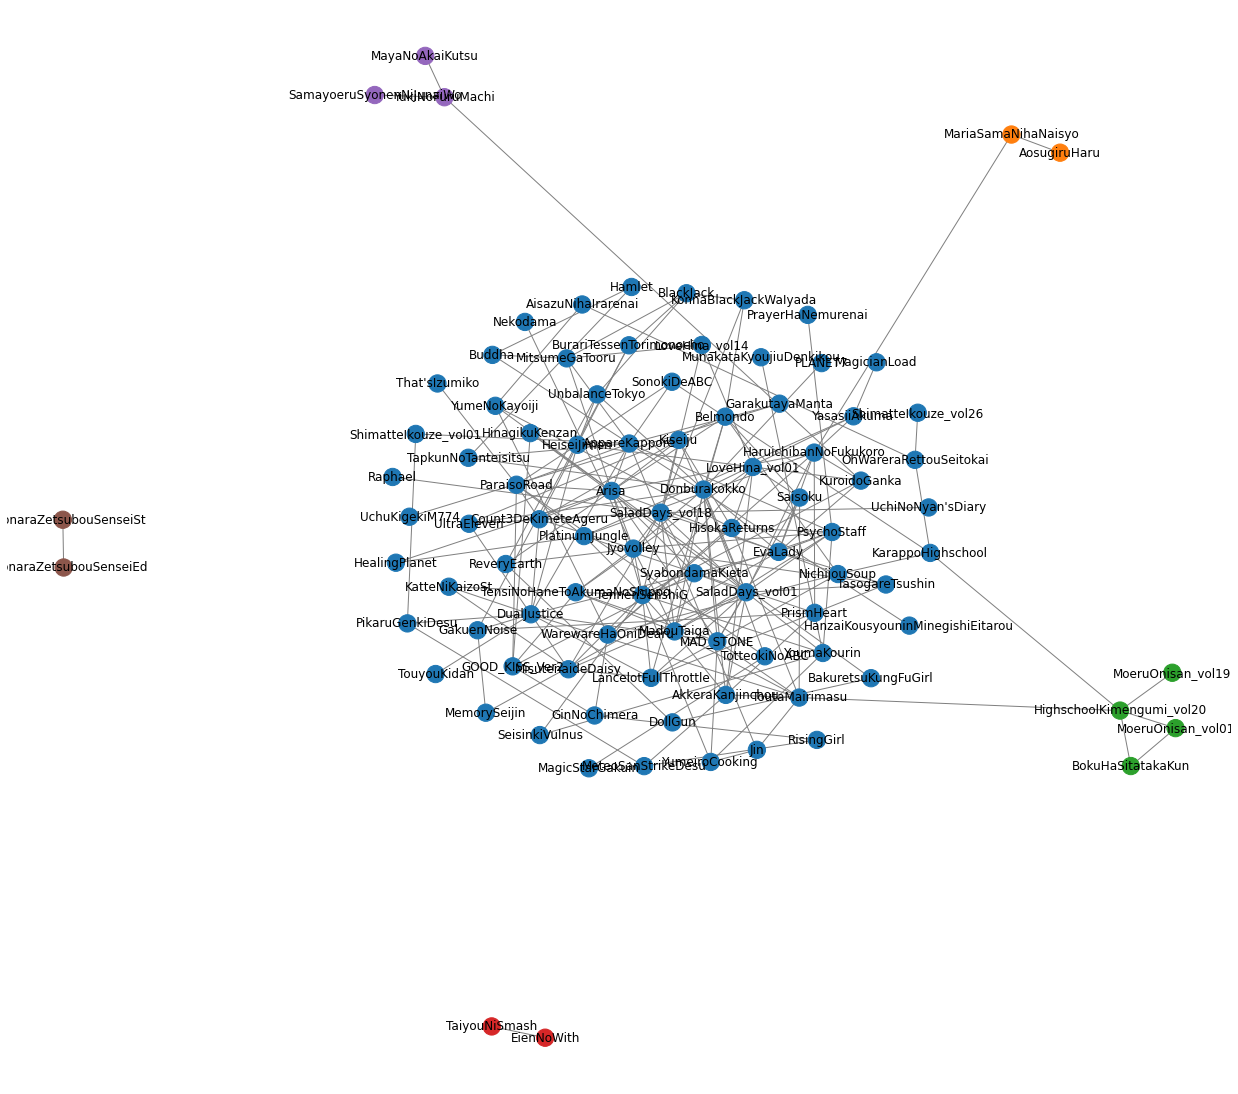

In [17]:
from networkx.algorithms.community.centrality import girvan_newman

comp = girvan_newman(G)

max_shown = 3
shown_count = 1
possibilities = []
for communities in itertools.islice(comp, max_shown):
    print("Possibility", shown_count, ": ", end='')

    pos = palsgraph.getpos(G, communities)
    color_map = palsgraph.gen_colormap(G, communities)

    shown_count += 1

    plt.figure(figsize=(17, 15))
    nx.draw(G, pos=pos, node_color=color_map, edge_color='grey', with_labels=True)
    plt.show()